THIS NOTEBOOK REFERS THE RESULT OF TASK 2 OF QUANTIUM VIRTUAL INTERSHIP OF CHIPS ANALYSIS.TRY TO LEARN SOMETHING INSTEAD OF COPYING IT TO COMPLETE TASK.IF YOU NOW SOMETHING BETTER PLZ LET ME KNOW IN COMMENTS AND AS WELL AS OTHERS

THANKS

IN CASE IF YOU DON'T LAND ON MY TASK 1 RESULT HERE IS LINK:https://www.kaggle.com/code/randhirasdataanalyst/quantium-chips-analysis-task1

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quantium-task2-dataset/QVI_data.csv


In [2]:
#importing libraries to remove filter error and re
import re
import warnings
warnings.filterwarnings('ignore')
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

                                                                TASK 2
                                                      QUANTIUM VIRTUAL INTERNSHIP

Task to do:
Define metrics to select control stores.

Analyze trial stores against controls.

Use R/Python for data analysis and visualization and summarise findings and provide recommendations.

THIS IS WHAT WE NEED TO FIND:
                                                    
                                                    total sales revenue
                                                    
                                                    total number of customers
                                                    
                                                    average number of transactions per customer


I know task 2 is confusing and hard to understand as beginner so, let me explain what exactly we need to do in this task:
as we have already given a trial store 77,86 and 88 we have to find out control store from a dataset whose value matches for given task like total sales revenue,total number of customer and average number of transaction per customer in a period and analyze the factor how vary for control store and trial store 

In [3]:
df=pd.read_csv('/kaggle/input/quantium-task2-dataset/QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.STORE_NBR.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
#let's add new column to dataset with year+month
df['DATE']=pd.to_datetime(df['DATE'])
df['YEARMONTH']=df['DATE'].dt.year*100+df['DATE'].dt.month
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


Finding the metrics for analysis over time :


In [6]:
metrics=df.groupby(['STORE_NBR','YEARMONTH']).agg(
    TOTAL_SALES=('TOT_SALES',sum),
    TOTAL_CUSTOMER=('LYLTY_CARD_NBR',pd.Series.nunique),
    nTXNperCUSTOMER=('TXN_ID',lambda x: x.nunique()/df['LYLTY_CARD_NBR'].nunique()),
    nCHIPSperTXN=('PROD_QTY',lambda x: x.sum()/df['TXN_ID'].nunique()),
    avgPRICEperUNIT=('TOT_SALES',lambda x: x.sum()/df['PROD_QTY'].sum())
).reset_index()

In [7]:
metrics

,STORE_NBR,YEARMONTH,TOTAL_SALES,TOTAL_CUSTOMER,nTXNperCUSTOMER,nCHIPSperTXN,avgPRICEperUNIT
0,1,201807,206.9,49,0.000716,0.000236,0.000410
1,1,201808,176.1,42,0.000592,0.000205,0.000349
2,1,201809,278.8,59,0.000854,0.000285,0.000552
3,1,201810,188.1,44,0.000620,0.000220,0.000373
4,1,201811,192.6,46,0.000647,0.000217,0.000382
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,0.000661,0.000346,0.000784
3165,272,201903,442.3,50,0.000730,0.000384,0.000876
3166,272,201904,445.1,54,0.000757,0.000399,0.000882
3167,272,201905,314.6,34,0.000551,0.000270,0.000623


Filtering pre-trial period

In [8]:
pre_trial_period=metrics[metrics['YEARMONTH']<201902]
pre_trial_period

,STORE_NBR,YEARMONTH,TOTAL_SALES,TOTAL_CUSTOMER,nTXNperCUSTOMER,nCHIPSperTXN,avgPRICEperUNIT
0,1,201807,206.9,49,0.000716,0.000236,0.000410
1,1,201808,176.1,42,0.000592,0.000205,0.000349
2,1,201809,278.8,59,0.000854,0.000285,0.000552
3,1,201810,188.1,44,0.000620,0.000220,0.000373
4,1,201811,192.6,46,0.000647,0.000217,0.000382
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,0.000496,0.000270,0.000604
3160,272,201810,430.6,44,0.000688,0.000376,0.000853
3161,272,201811,376.2,41,0.000620,0.000331,0.000745
3162,272,201812,403.9,47,0.000647,0.000338,0.000800


selecting control store


To ensure a fair comparison, we need to select control stores that match the trial stores in terms of sales trends and
performance.

We calculate the correlation between the trial stores and each potential control store to measure the similarity of trends.


In [9]:
def correlation(input_table, metric_col, trial_store_nbr):
    store_nbr = input_table['STORE_NBR'].unique()
    corr_table = []
    
    for store in store_nbr:
        # Align data for the trial store and the current store on the common time period (YEARMONTH)
        trial_store_data = input_table[input_table['STORE_NBR'] == trial_store_nbr][['YEARMONTH', metric_col]]
        store_data = input_table[input_table['STORE_NBR'] == store][['YEARMONTH', metric_col]]
        
        # Merge the data on the common YEARMONTH to ensure the same length
        merged_data = pd.merge(trial_store_data, store_data, on='YEARMONTH', suffixes=('_trial', '_control'))
        
        if len(merged_data) > 1:  # To avoid computing correlation with a single data point or no data
            # Calculate correlation
            corr_measure = np.corrcoef(merged_data[f'{metric_col}_trial'], merged_data[f'{metric_col}_control'])[0, 1]
            corr_table.append({'Store1': trial_store_nbr, 'Store2': store, 'corr_measure': corr_measure})
        else:
            # If no data is available for comparison, append NaN
            corr_table.append({'Store1': trial_store_nbr, 'Store2': store, 'corr_measure': np.nan})
    
    return pd.DataFrame(corr_table)


In [10]:
trial_store=77
corr_nSales=correlation(pre_trial_period,'TOTAL_SALES',trial_store)
corr_nSales.sort_values(by='corr_measure',ascending=False)

,Store1,Store2,corr_measure
30,77,31,1.000000
76,77,77,1.000000
10,77,11,1.000000
70,77,71,0.914106
231,77,233,0.903774
...,...,...,...
84,77,85,NaN
191,77,193,NaN
204,77,206,NaN
209,77,211,NaN


Correlation measures trend similarity, but stores can have different absolute sales numbers. 
Magnitude distance calculates the difference in absolute values between the trial and control stores. 
The distances are standardized to a 0-1 scale.


In [11]:
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    store_numbers = input_table['STORE_NBR'].unique()
    dist_table = []
    
    for store in store_numbers:
        # Align data for the trial store and the current store based on common YEARMONTH
        store_comparison_data = input_table[input_table['STORE_NBR'] == store_comparison][['YEARMONTH', metric_col]]
        store_data = input_table[input_table['STORE_NBR'] == store][['YEARMONTH', metric_col]]
        
        # Merge the data to ensure both have the same time period
        merged_data = pd.merge(store_comparison_data, store_data, on='YEARMONTH', suffixes=('_comparison', '_store'))
        
        if len(merged_data) > 1:  # Ensure enough data points to calculate the magnitude distance
            # Calculate the mean absolute difference between the stores' metrics
            measure = abs(merged_data[f'{metric_col}_comparison'].values - merged_data[f'{metric_col}_store'].values).mean()
            dist_table.append({'Store1': store_comparison, 'Store2': store, 'measure': measure})
        else:
            # If no data is available for comparison, append NaN
            dist_table.append({'Store1': store_comparison, 'Store2': store, 'measure': np.nan})
    
    # Convert the list to a DataFrame
    dist_df = pd.DataFrame(dist_table)

    # Standardize the magnitude distances (0 to 1 scale)
    min_max_dist = dist_df.groupby(['Store1']).agg(minDist=('measure', 'min'), maxDist=('measure', 'max')).reset_index()
    dist_table = dist_df.merge(min_max_dist, on='Store1')
    
    # Calculate the standardized magnitude distance (0 to 1 scale)
    dist_table['magnitudeMeasure'] = 1 - (dist_table['measure'] - dist_table['minDist']) / (dist_table['maxDist'] - dist_table['minDist'])
    
    # Return the final table with averaged magnitude measures for each store comparison
    return dist_table.groupby(['Store1', 'Store2']).agg(mag_measure=('magnitudeMeasure', 'mean')).reset_index()



In [12]:
magnitude_nSales = calculate_magnitude_distance(pre_trial_period, 'TOTAL_SALES', 77)
magnitude_nSales.sort_values(by='mag_measure',ascending=False)

,Store1,Store2,mag_measure
76,77,77,1.000000
231,77,233,0.984567
253,77,255,0.976581
186,77,188,0.974509
52,77,53,0.973385
...,...,...,...
84,77,85,NaN
191,77,193,NaN
204,77,206,NaN
209,77,211,NaN


In [13]:
#combining correlation and magintude distance for total sales 
corr_weight=0.5
corr_and_mag_sales=corr_nSales.merge(magnitude_nSales,on=['Store1','Store2'])
corr_and_mag_sales['corr_mag_sales_score']=corr_and_mag_sales['corr_measure'] * corr_weight + corr_and_mag_sales['mag_measure'] * (1-corr_weight)

In [14]:
corr_and_mag_sales.sort_values(by='corr_mag_sales_score',ascending=False)

,Store1,Store2,corr_measure,mag_measure,corr_mag_sales_score
76,77,77,1.000000,1.000000,1.000000
231,77,233,0.903774,0.984567,0.944171
30,77,31,1.000000,0.813241,0.906620
10,77,11,1.000000,0.809389,0.904694
40,77,41,0.783232,0.962834,0.873033
...,...,...,...,...,...
84,77,85,NaN,NaN,NaN
191,77,193,NaN,NaN,NaN
204,77,206,NaN,NaN,NaN
209,77,211,NaN,NaN,NaN


In [15]:
# For number of customers
corr_customer=correlation(pre_trial_period,'TOTAL_CUSTOMER',77)
mag_customer=calculate_magnitude_distance(pre_trial_period,'TOTAL_CUSTOMER',77)

#combining correlation and magnitude distance for total number of customers 

corr_and_mag_cust=corr_customer.merge(mag_customer,on=['Store1','Store2'])
corr_and_mag_cust['corr_mag_cust_score']=corr_and_mag_cust['corr_measure']*0.5+corr_and_mag_cust['mag_measure']*(1-0.5)

In [16]:
#combining correlation and magnitude distance of total sales and total number of customers along with their scores on store1 and store 2
final_score=corr_and_mag_sales.merge(corr_and_mag_cust,on=['Store1','Store2'])
final_score['final_score']=final_score['corr_mag_sales_score']*0.5+final_score['corr_mag_cust_score']*(1-0.5)


In [17]:
final_score.sort_values(by='final_score',ascending=False)

,Store1,Store2,corr_measure_x,mag_measure_x,corr_mag_sales_score,corr_measure_y,mag_measure_y,corr_mag_cust_score,final_score
76,77,77,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
231,77,233,0.903774,0.984567,0.944171,0.990358,0.992343,0.991350,0.967761
40,77,41,0.783232,0.962834,0.873033,0.844219,0.973966,0.909093,0.891063
16,77,17,0.842668,0.872450,0.857559,0.747308,0.961715,0.854511,0.856035
252,77,254,0.577108,0.917168,0.747138,0.916208,0.934150,0.925179,0.836159
...,...,...,...,...,...,...,...,...,...
84,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,77,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,77,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,77,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
control_store = final_score.loc[final_score['Store1'] == trial_store].sort_values('final_score', ascending=False).iloc[1]['Store2']
control_store

233.0

VISUALIZATION FOR TOTAL SALES OVER MONTH 

In [19]:
control_store_nbr=233
trial_store_nbr=77
control_store_sales=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_SALES']]
trial_store_sales=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_SALES']]
other_store_sales=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_SALES']]

control_store_sales['YEARMONTH'] = pd.to_datetime(control_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
trial_store_sales['YEARMONTH'] = pd.to_datetime(trial_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
other_store_sales['YEARMONTH'] = pd.to_datetime(other_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')


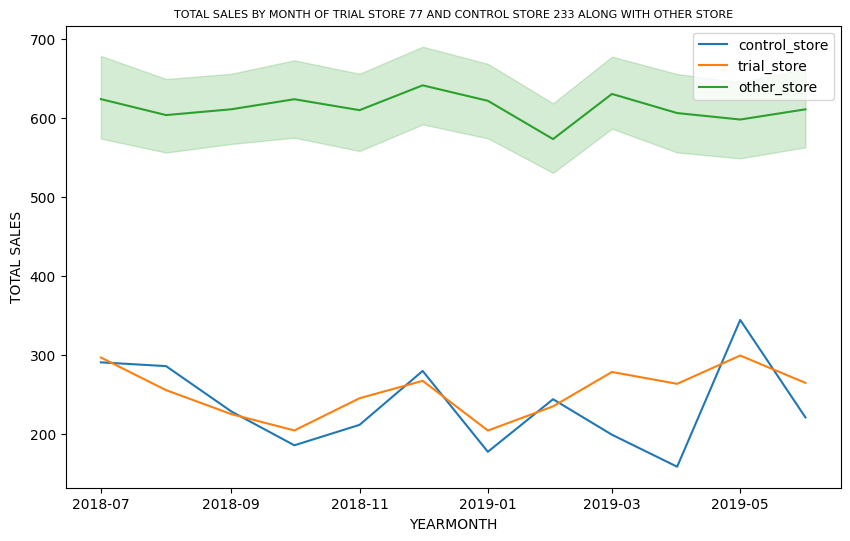

In [20]:

plt.figure(figsize=(10, 6))

sns.lineplot(data=control_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='control_store')
sns.lineplot(data=trial_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='trial_store')
sns.lineplot(data=other_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='other_store')
plt.title('TOTAL SALES BY MONTH OF TRIAL STORE 77 AND CONTROL STORE 233 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL SALES')
plt.legend()
plt.show()

VISUALIZATION FOR TOTAL CUSTOMERS BY MONTHS 

In [21]:
control_store_nbr=233
trial_store_nbr=77
control_store_cust=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
trial_store_cust=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
other_store_cust=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_CUSTOMER']]

control_store_cust['YEARMONTH'] = pd.to_datetime(control_store_cust['YEARMONTH'].astype(str)+'01', format='%Y%m%d')
trial_store_cust['YEARMONTH'] = pd.to_datetime(trial_store_cust['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
other_store_cust['YEARMONTH'] = pd.to_datetime(other_store_cust['YEARMONTH'].astype(str) + '01', format='%Y%m%d')


In [22]:
control_store_cust

,YEARMONTH,TOTAL_CUSTOMER
2699,2018-07-01,51
2700,2018-08-01,48
2701,2018-09-01,42
2702,2018-10-01,35
2703,2018-11-01,40
2704,2018-12-01,47
2705,2019-01-01,35
2706,2019-02-01,45
2707,2019-03-01,40
2708,2019-04-01,30


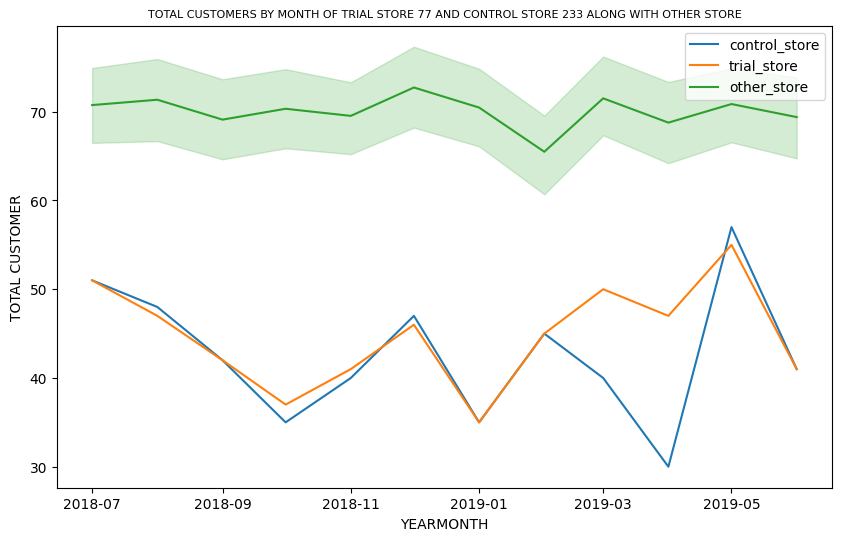

In [23]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=control_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='control_store')
sns.lineplot(data=trial_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='trial_store')
sns.lineplot(data=other_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='other_store')
plt.title('TOTAL CUSTOMERS BY MONTH OF TRIAL STORE 77 AND CONTROL STORE 233 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL CUSTOMER')
plt.legend()
plt.show()


                                                        FOR TRIAL STORE 86


FOR TOTAL SALES

In [24]:
corr_sales=correlation(pre_trial_period,'TOTAL_SALES',86)
dist_sales=calculate_magnitude_distance(pre_trial_period,'TOTAL_SALES',86)

In [25]:
#combining correaltion and distance metric of trial store number 86
corr_weight=0.5
corr_dist_sales=corr_sales.merge(dist_sales,on=['Store1','Store2'])
corr_dist_sales['corr_mag_sales_score']=corr_dist_sales['corr_measure']*corr_weight+corr_dist_sales['mag_measure']*corr_weight

In [26]:
corr_dist_sales.sort_values(by='corr_mag_sales_score',ascending=False)

,Store1,Store2,corr_measure,mag_measure,corr_mag_sales_score
85,86,86,1.000000,1.000000,1.000000
153,86,155,0.877882,0.964282,0.921082
220,86,222,0.795075,0.960541,0.877808
107,86,109,0.788300,0.965225,0.876762
136,86,138,0.759864,0.928006,0.843935
...,...,...,...,...,...
84,86,85,NaN,NaN,NaN
191,86,193,NaN,NaN,NaN
204,86,206,NaN,NaN,NaN
209,86,211,NaN,NaN,NaN


FOR TOTAL CUSTOMERS

In [27]:
corr_cust=correlation(pre_trial_period,'TOTAL_CUSTOMER',86)
dist_cust=calculate_magnitude_distance(pre_trial_period,'TOTAL_CUSTOMER',86)

In [28]:
#combining correaltion and distance metric of trial store number 86
corr_weight=0.5
corr_dist_cust=corr_cust.merge(dist_cust,on=['Store1','Store2'])
corr_dist_cust['corr_mag_cust_score']=corr_dist_cust['corr_measure']*corr_weight+corr_dist_cust['mag_measure']*corr_weight

In [29]:
corr_dist_cust.sort_values(by='corr_mag_cust_score',ascending=False)


,Store1,Store2,corr_measure,mag_measure,corr_mag_cust_score
85,86,86,1.000000,1.000000,1.000000
153,86,155,0.942876,0.986063,0.964469
112,86,114,0.855339,0.938676,0.897008
107,86,109,0.770778,0.967944,0.869361
223,86,225,0.733791,0.967944,0.850868
...,...,...,...,...,...
84,86,85,NaN,NaN,NaN
191,86,193,NaN,NaN,NaN
204,86,206,NaN,NaN,NaN
209,86,211,NaN,NaN,NaN


In [30]:
#combining correlation and magnitude distance of total sales and total number of customers along with their scores on store1 and store 2 for trial store 86
final_score=corr_dist_sales.merge(corr_dist_cust,on=['Store1','Store2'])
final_score['final_score']=final_score['corr_mag_sales_score']*0.5+final_score['corr_mag_cust_score']*(1-0.5)


In [31]:
final_score.sort_values(by='final_score',ascending=False)


,Store1,Store2,corr_measure_x,mag_measure_x,corr_mag_sales_score,corr_measure_y,mag_measure_y,corr_mag_cust_score,final_score
85,86,86,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
153,86,155,0.877882,0.964282,0.921082,0.942876,0.986063,0.964469,0.942775
107,86,109,0.788300,0.965225,0.876762,0.770778,0.967944,0.869361,0.873062
112,86,114,0.734415,0.924351,0.829383,0.855339,0.938676,0.897008,0.863195
136,86,138,0.759864,0.928006,0.843935,0.749701,0.931707,0.840704,0.842319
...,...,...,...,...,...,...,...,...,...
84,86,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,86,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,86,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,86,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
new_trial_store=86
control_store_for_trial_store_86=final_score.loc[final_score['Store1']==new_trial_store].sort_values(by='final_score',ascending=False).iloc[1]['Store2']

In [33]:
control_store_for_trial_store_86

155.0

LET'S CONFIRM OUR ANALYSIS USING VISUALIZATION 

VISUALIZATION FOR TOTAL SALES OVER MONTH 

In [34]:
control_store_nbr=155
trial_store_nbr=86
control_store_sales=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_SALES']]
trial_store_sales=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_SALES']]
other_store_sales=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_SALES']]


control_store_sales['YEARMONTH'] = pd.to_datetime(control_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
trial_store_sales['YEARMONTH'] = pd.to_datetime(trial_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
other_store_sales['YEARMONTH'] = pd.to_datetime(other_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')


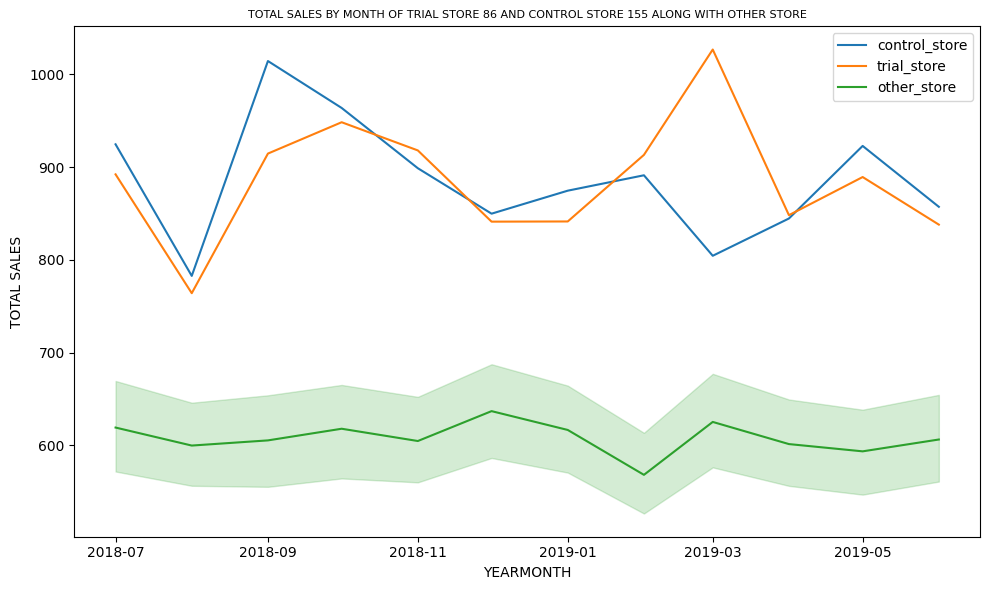

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=control_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='control_store')
sns.lineplot(data=trial_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='trial_store')
sns.lineplot(data=other_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='other_store')
plt.title('TOTAL SALES BY MONTH OF TRIAL STORE 86 AND CONTROL STORE 155 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL SALES')
plt.legend()
plt.tight_layout()
plt.show()

VISUALISATION FOR TOTAL CUSTOMERS FOR TRIAL STORE 86 AND CONTROL STORE 155 ALONG WITH OTHER STORE CUSTOMERS.


In [36]:
control_store_nbr=155
trial_store_nbr=86
control_store_cust=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
trial_store_cust=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
other_store_cust=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_CUSTOMER']]

control_store_cust['YEARMONTH']=pd.to_datetime(control_store_cust['YEARMONTH'].astype('str'),format='%Y%m')
trial_store_cust['YEARMONTH']=pd.to_datetime(trial_store_cust['YEARMONTH'].astype('str'),format='%Y%m')
other_store_cust['YEARMONTH']=pd.to_datetime(other_store_cust['YEARMONTH'].astype('str'),format='%Y%m')


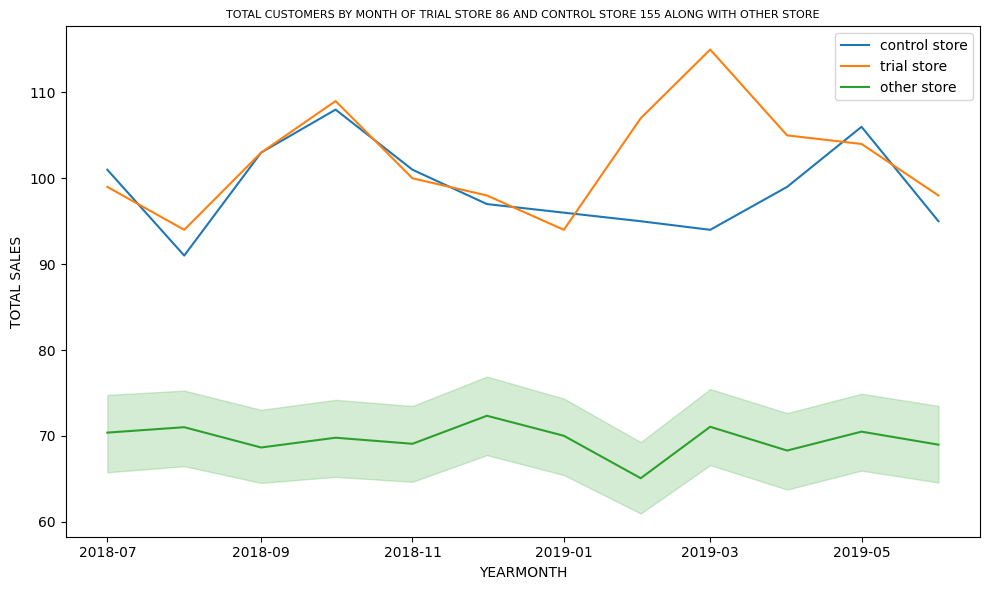

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=control_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='control store')
sns.lineplot(data=trial_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='trial store')
sns.lineplot(data=other_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='other store')
plt.title('TOTAL CUSTOMERS BY MONTH OF TRIAL STORE 86 AND CONTROL STORE 155 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL SALES')
plt.legend()
plt.tight_layout()
plt.show()


                                                        FOR TRIAL STORE 88


FOR TOTAL SALES

In [38]:
corr_sales=correlation(pre_trial_period,'TOTAL_SALES',88)
dist_sales=calculate_magnitude_distance(pre_trial_period,'TOTAL_SALES',88)

In [39]:
#combining correaltion and distance metric of trial store number 86
corr_weight=0.5
corr_dist_sales=corr_sales.merge(dist_sales,on=['Store1','Store2'])
corr_dist_sales['corr_mag_sales_score']=corr_dist_sales['corr_measure']*corr_weight+corr_dist_sales['mag_measure']*corr_weight

In [40]:
corr_dist_sales.sort_values(by='corr_mag_sales_score',ascending=False)


,Store1,Store2,corr_measure,mag_measure,corr_mag_sales_score
87,88,88,1.000000,1.000000,1.000000
123,88,125,0.624109,0.859154,0.741632
201,88,203,0.508001,0.952633,0.730317
90,88,91,0.776688,0.677166,0.726927
176,88,178,0.731857,0.709362,0.720609
...,...,...,...,...,...
84,88,85,NaN,NaN,NaN
191,88,193,NaN,NaN,NaN
204,88,206,NaN,NaN,NaN
209,88,211,NaN,NaN,NaN


FOR TOTAL CUSTOMER


In [41]:
corr_cust=correlation(pre_trial_period,'TOTAL_CUSTOMER',88)
dist_cust=calculate_magnitude_distance(pre_trial_period,'TOTAL_CUSTOMER',88)

In [42]:
#combining correaltion and distance metric of trial store number 88
corr_weight=0.5
corr_dist_cust=corr_cust.merge(dist_cust,on=['Store1','Store2'])
corr_dist_cust['corr_mag_cust_score']=corr_dist_cust['corr_measure']*corr_weight+corr_dist_cust['mag_measure']*corr_weight

In [43]:
corr_dist_cust.sort_values(by='corr_mag_cust_score',ascending=False)


,Store1,Store2,corr_measure,mag_measure,corr_mag_cust_score
87,88,88,1.000000,1.000000,1.000000
235,88,237,0.947326,0.987528,0.967427
176,88,178,0.939466,0.824263,0.881865
68,88,69,0.815792,0.871882,0.843837
111,88,113,0.862632,0.787982,0.825307
...,...,...,...,...,...
84,88,85,NaN,NaN,NaN
191,88,193,NaN,NaN,NaN
204,88,206,NaN,NaN,NaN
209,88,211,NaN,NaN,NaN


In [44]:
#combining correlation and magnitude distance of total sales and total number of customers along with their scores on store1 and store 2 for trial store 88
final_score=corr_dist_sales.merge(corr_dist_cust,on=['Store1','Store2'])
final_score['final_score']=final_score['corr_mag_sales_score']*0.5+final_score['corr_mag_cust_score']*(1-0.5)


In [45]:
final_score.sort_values(by='final_score',ascending=False)


,Store1,Store2,corr_measure_x,mag_measure_x,corr_mag_sales_score,corr_measure_y,mag_measure_y,corr_mag_cust_score,final_score
87,88,88,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
176,88,178,0.731857,0.709362,0.720609,0.939466,0.824263,0.881865,0.801237
235,88,237,0.308479,0.958131,0.633305,0.947326,0.987528,0.967427,0.800366
68,88,69,0.450029,0.720904,0.585466,0.815792,0.871882,0.843837,0.714652
111,88,113,0.495763,0.696975,0.596369,0.862632,0.787982,0.825307,0.710838
...,...,...,...,...,...,...,...,...,...
84,88,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,88,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,88,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,88,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
trial_store=88
control_store_for_trial_store_88=final_score.loc[final_score['Store1']==trial_store].sort_values(by='final_score',ascending=False).iloc[2]['Store2']

In [47]:
control_store_for_trial_store_88

237.0

I KNOW YOU WONDER ABOVE WHY I SELECT 237 AS CONTROL STORE FOR TRIAL STORE 88 INSTEAD OF STORE NUMBER 178 WHERE IT RANKED AS SECOND HERE IS WHY I SELECT 237 AS CONTROL STORE BECAUSE WHEN YOU CAREFULLY NOTICE THAT THE FINAL SCORE OF STORE NUMBER 237 AND 178 IS APPROX 0.80 BUT THE DIFFERENCE WHICH MAKE 237 AS CONTROL STORE IS THAT CORRELATION AND MAGNITUDE SCORE FOR TOTAL CUSTOMER IS MORE FOR 237 THAN 178 AND ALONE MAGNITUDE MEASURE FOR TOTAL SALES AND TOTAL CUSTOMER IS HEIGHER THAN STORE NUMBER 178 WHICH LEAD ME TO CHOICE IT AS CONTROL STORE 

BTW BOTH STORE ARE GIVING TOUGH FIGHT. YOU CAN VERFIY IT BY VISUAL IT 



LET'S CONFIRM OUR ANALYSIS USING VISUALIZATION

VISUALISATION FOR TOTAL SALES OVER MONTH

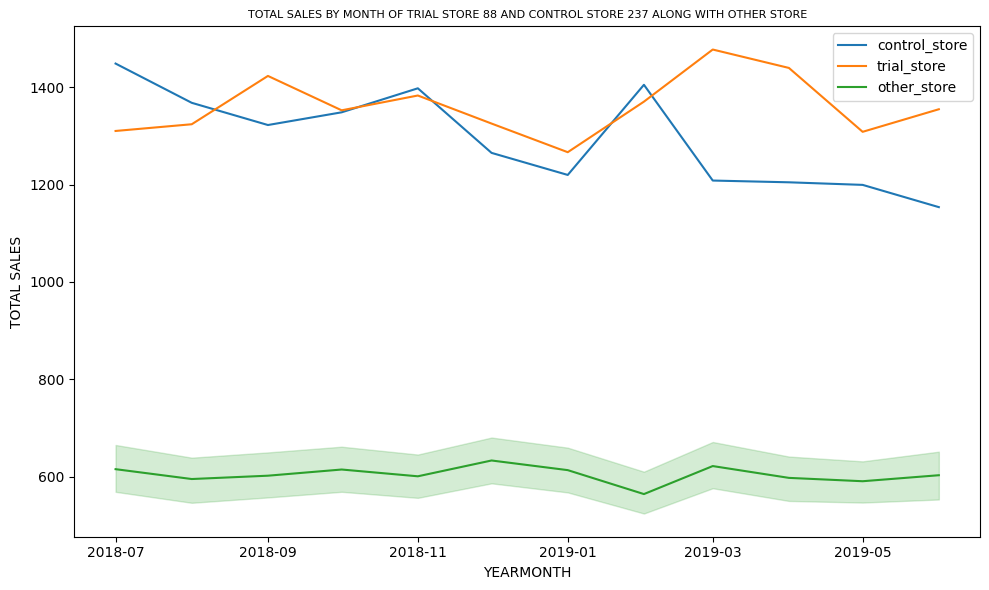

In [48]:
control_store_nbr=237
trial_store_nbr=88
control_store_sales=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_SALES']]
trial_store_sales=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_SALES']]
other_store_sales=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_SALES']]


control_store_sales['YEARMONTH'] = pd.to_datetime(control_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
trial_store_sales['YEARMONTH'] = pd.to_datetime(trial_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
other_store_sales['YEARMONTH'] = pd.to_datetime(other_store_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

plt.figure(figsize=(10, 6))
sns.lineplot(data=control_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='control_store')
sns.lineplot(data=trial_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='trial_store')
sns.lineplot(data=other_store_sales,x='YEARMONTH',y='TOTAL_SALES',label='other_store')
plt.title('TOTAL SALES BY MONTH OF TRIAL STORE 88 AND CONTROL STORE 237 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL SALES')
plt.legend()
plt.tight_layout()
plt.show()

VISUALISATION FOR TOTAL CUSTOMERS FOR TRIAL STORE 86 AND CONTROL STORE 155 ALONG WITH OTHER STORE CUSTOMERS.

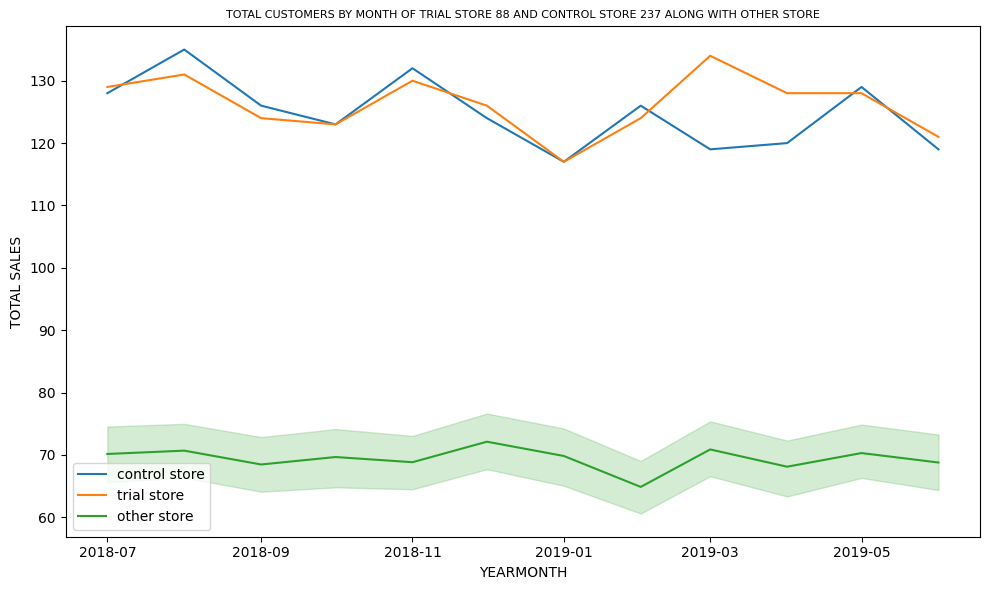

In [49]:
control_store_nbr=237
trial_store_nbr=88
control_store_cust=metrics[metrics['STORE_NBR']==control_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
trial_store_cust=metrics[metrics['STORE_NBR']==trial_store_nbr][['YEARMONTH','TOTAL_CUSTOMER']]
other_store_cust=metrics[~metrics['STORE_NBR'].isin([control_store_nbr,trial_store_nbr])][['YEARMONTH','TOTAL_CUSTOMER']]

control_store_cust['YEARMONTH']=pd.to_datetime(control_store_cust['YEARMONTH'].astype('str'),format='%Y%m')
trial_store_cust['YEARMONTH']=pd.to_datetime(trial_store_cust['YEARMONTH'].astype('str'),format='%Y%m')
other_store_cust['YEARMONTH']=pd.to_datetime(other_store_cust['YEARMONTH'].astype('str'),format='%Y%m')

plt.figure(figsize=(10, 6))
sns.lineplot(data=control_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='control store')
sns.lineplot(data=trial_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='trial store')
sns.lineplot(data=other_store_cust,x='YEARMONTH',y='TOTAL_CUSTOMER',label='other store')
plt.title('TOTAL CUSTOMERS BY MONTH OF TRIAL STORE 88 AND CONTROL STORE 237 ALONG WITH OTHER STORE',fontsize=8)
plt.ylabel('TOTAL SALES')
plt.legend()
plt.tight_layout()
plt.show()

CONCLUSION:
WE FOUND  STORE 233,155,237 AS CONTROL STORE FOR TRIAL STORE 77,86,88